# Postulación a NeuralWorks
## Data Science Challenge

En el siguiente Notebook se presentan las respuestas al desafío.

Felipe Uribe
09/01/2023

In [22]:
#Importasción de librerías
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb

In [2]:
df_raw = pd.read_csv('dataset_SCL.csv', low_memory=False)
df = df_raw.copy(deep=True)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
date_vars = ['Fecha-I', 'Fecha-O']

for column in df.columns:
    if column in date_vars:
        df[column] = pd.to_datetime(df[column])
    else:
        df[column] = df[column].astype('category')

df.dtypes

Fecha-I      datetime64[ns]
Vlo-I              category
Ori-I              category
Des-I              category
Emp-I              category
Fecha-O      datetime64[ns]
Vlo-O              category
Ori-O              category
Des-O              category
Emp-O              category
DIA                category
MES                category
AÑO                category
DIANOM             category
TIPOVUELO          category
OPERA              category
SIGLAORI           category
SIGLADES           category
dtype: object

In [4]:
df.describe(include='all',datetime_is_numeric=True)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,68206.0,68206.0,68206.0,68206,68206,68206,68206,68206
unique,NaN,584,1,64,30,NaN,861,1,63,32,31.0,12.0,2.0,7,2,23,1,62
top,NaN,174,SCEL,SCFA,LAN,NaN,174,SCEL,SCFA,LAN,20.0,12.0,2017.0,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,NaN,686,68206,5787,37611,NaN,649,68206,5786,20988,2290.0,6356.0,68204.0,10292,36966,40892,68206,6335
mean,2017-07-05 12:11:25.320059648,NaN,NaN,NaN,NaN,2017-07-05 12:20:31.971380992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017-01-01 00:15:00,NaN,NaN,NaN,NaN,2017-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017-03-31 12:41:15,NaN,NaN,NaN,NaN,2017-03-31 12:51:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017-07-10 05:30:00,NaN,NaN,NaN,NaN,2017-07-10 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017-10-08 11:18:45,NaN,NaN,NaN,NaN,2017-10-08 11:19:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017-12-31 23:55:00,NaN,NaN,NaN,NaN,2018-01-01 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


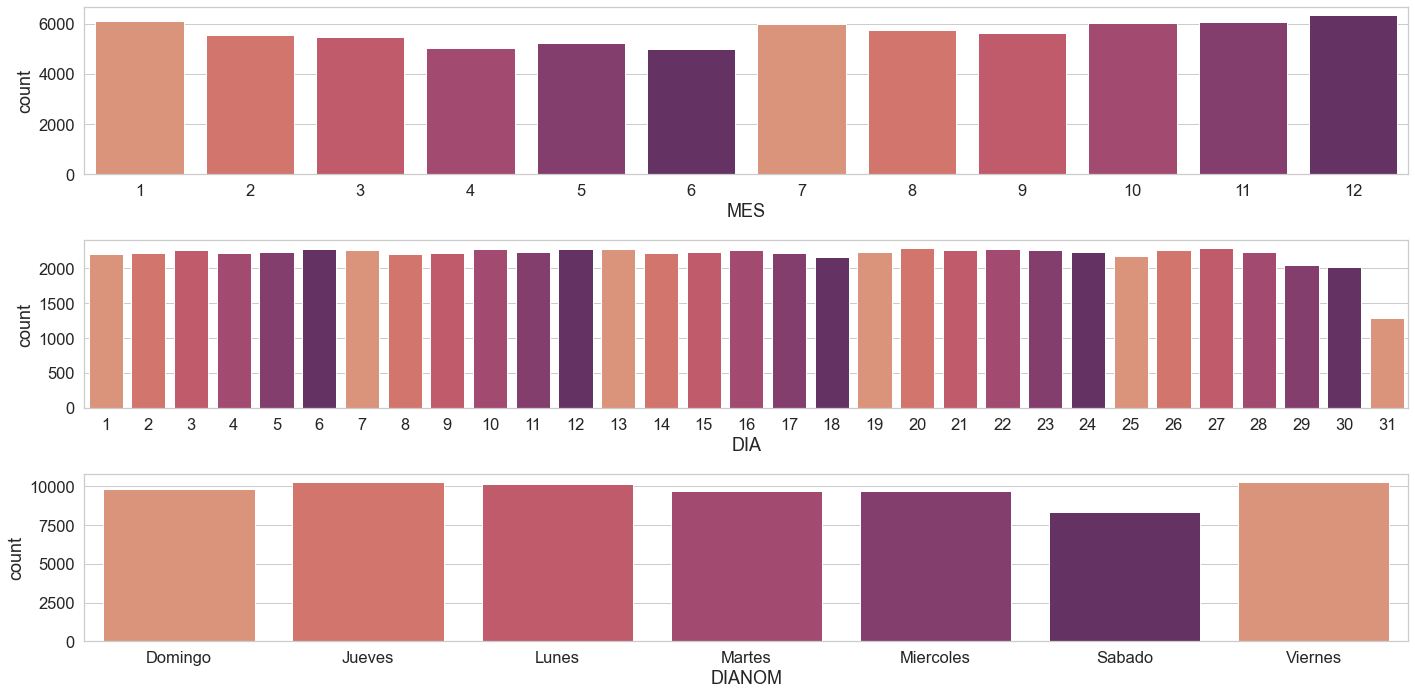

In [5]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid", font_scale=1.5)

date_categorical = ['MES','DIA', 'DIANOM']

plt.figure()
i = 0
for date_cat in date_categorical:
    plt.subplot(len(date_categorical), 1, 1 + i)
    sns.countplot(data=df, x=date_cat,palette = sns.color_palette("flare"))
    i += 1
plt.tight_layout()

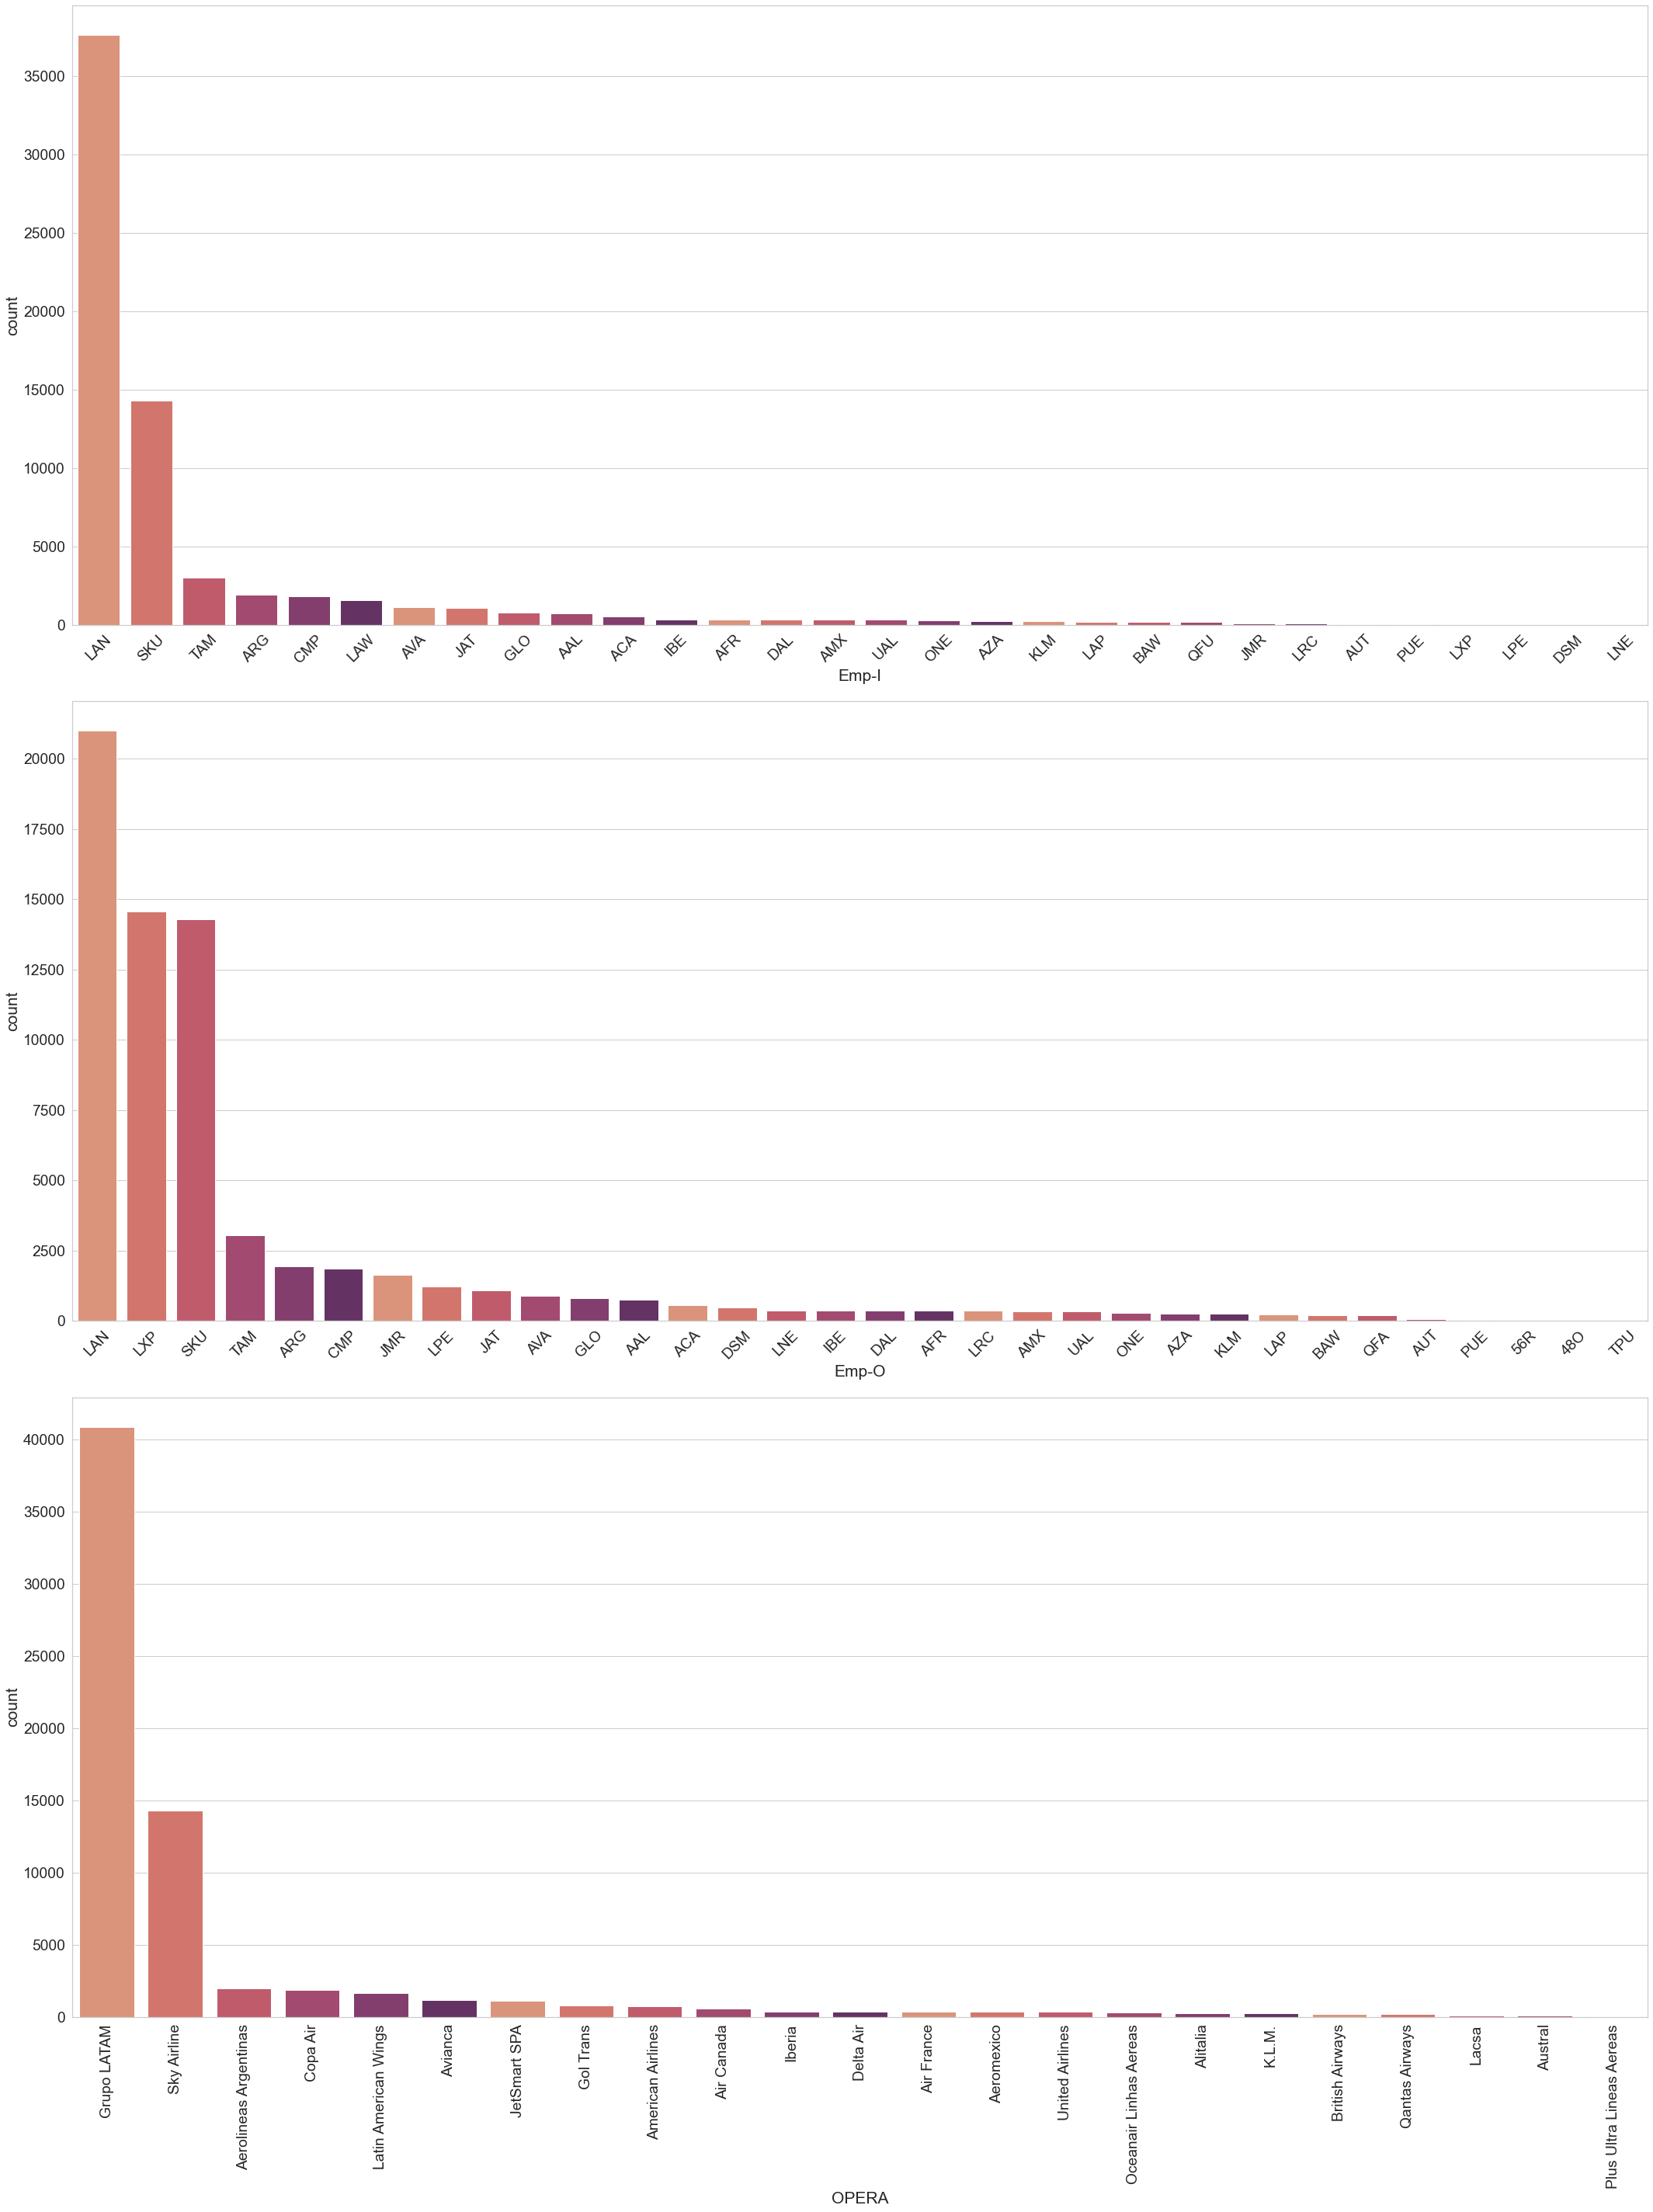

In [6]:
sns.set(rc={'figure.figsize':(30,40)})
sns.set_theme(style="whitegrid", font_scale=1.75)

categorical_vars = ['Emp-I','Emp-O','OPERA']
plt.figure()
i = 0
for cat in categorical_vars:
    plt.subplot(len(categorical_vars), 1, 1 + i)
    ax = sns.countplot(data=df, x=cat,palette = sns.color_palette("flare"),order = df[cat].value_counts().index)
    if cat == 'OPERA': r=90
    else: r = 45
    ax.set_xticklabels(ax.get_xticklabels(),rotation=r)
    i += 1
plt.tight_layout()

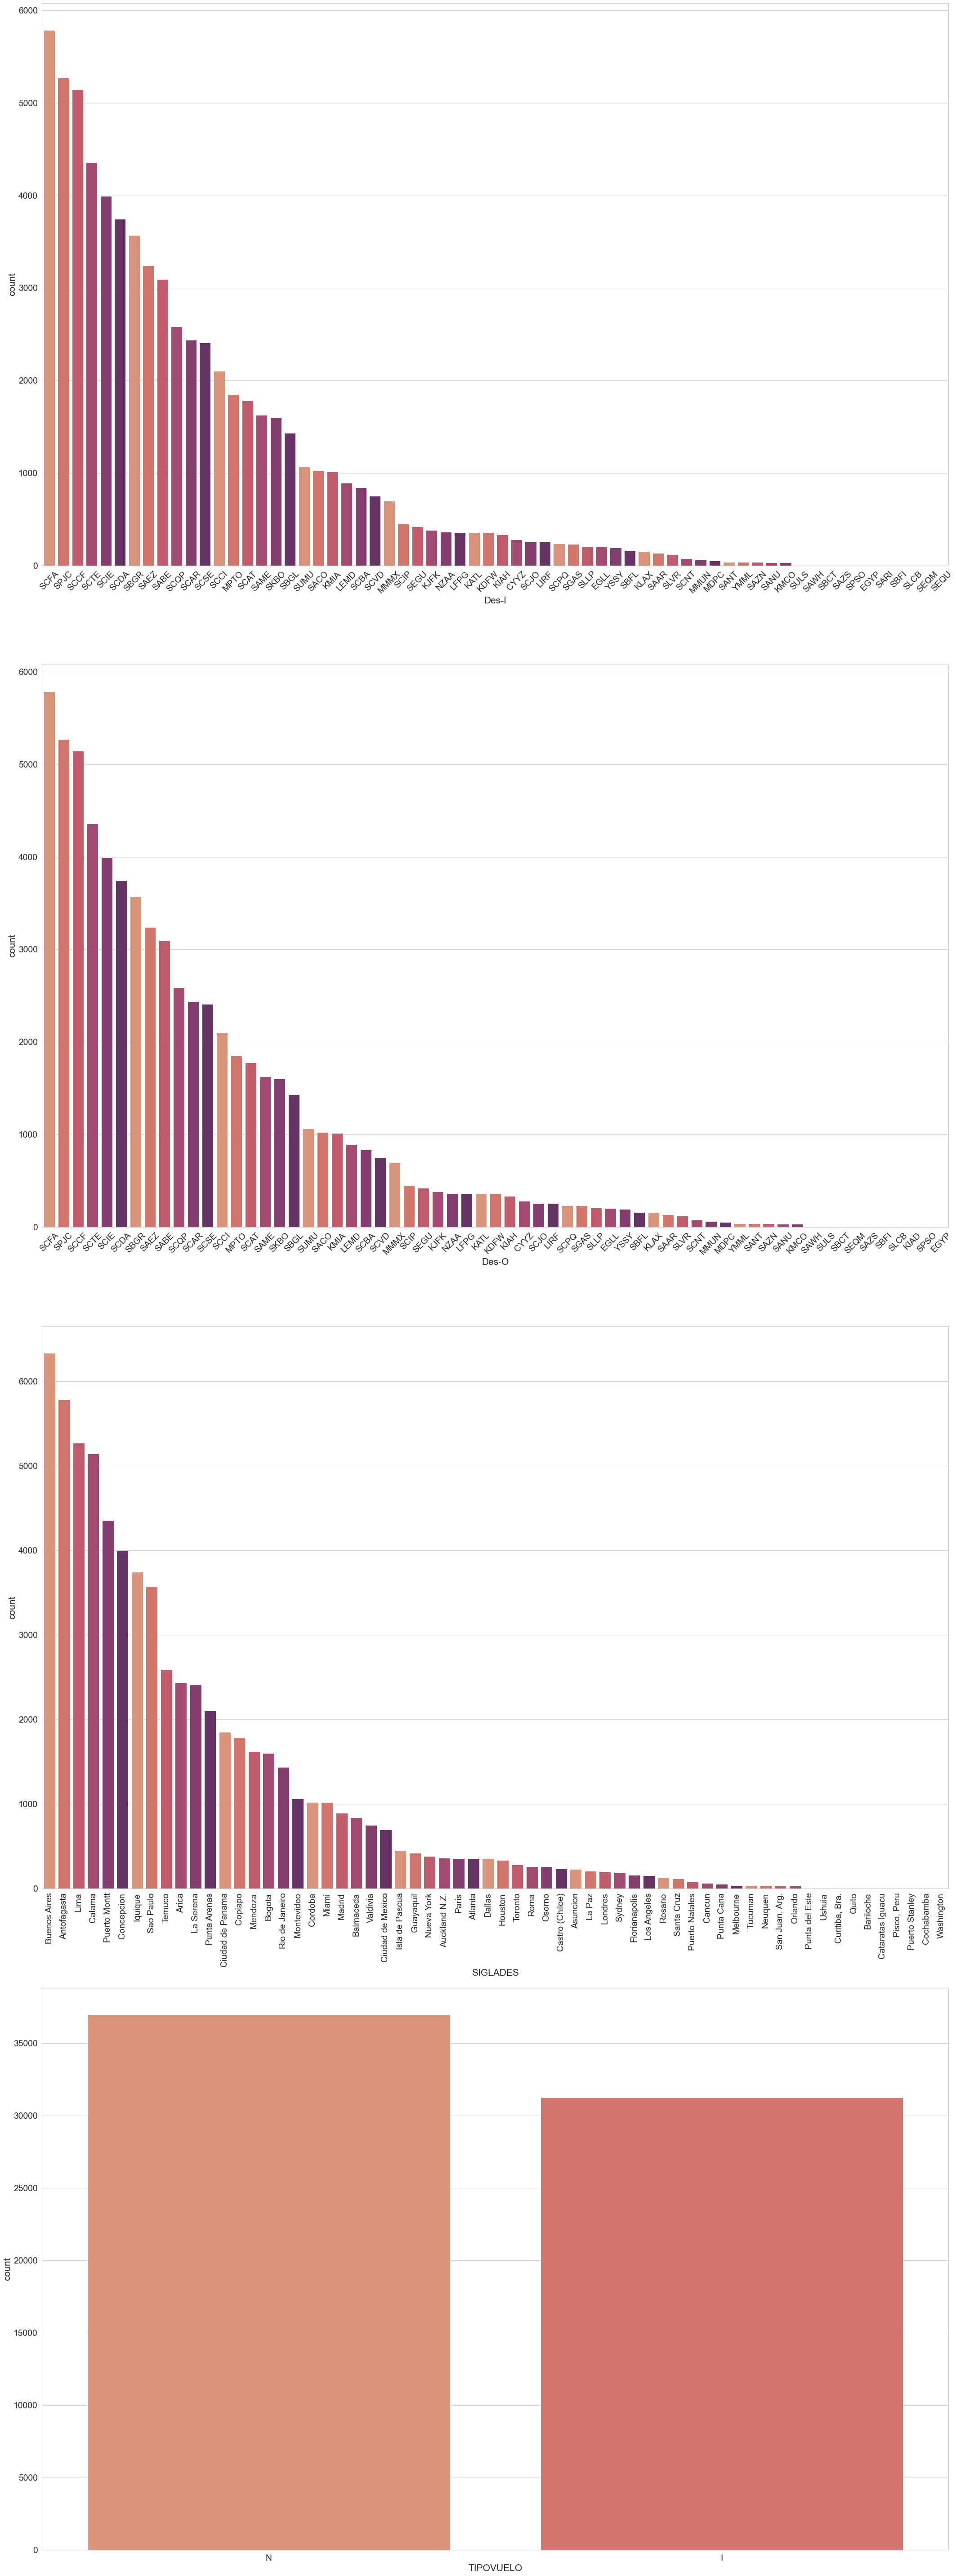

In [7]:
sns.set(rc={'figure.figsize':(30,80)})
sns.set_theme(style="whitegrid", font_scale=1.75)

categorical_vars = ['Des-I','Des-O','SIGLADES','TIPOVUELO']
plt.figure()
i = 0
for cat in categorical_vars:
    plt.subplot(len(categorical_vars), 1, 1 + i)
    ax = sns.countplot(data=df, x=cat,palette = sns.color_palette("flare"),order = df[cat].value_counts().index)
    if cat in ['Des-I','Des-O']: r = 45
    elif cat in ['SIGLADES']: r = 90
    else: r = 0
    ax.set_xticklabels(ax.get_xticklabels(),rotation=r)
    i += 1
plt.tight_layout()

In [8]:
df['verano'] = pd.Series(dtype = int)
verano_mask = (df['Fecha-I'] >= '2017-12-15') | (df['Fecha-I'] <= '2017-03-03')
df.loc[verano_mask,'verano'] = 1
df['verano'] = df['verano'].fillna(0)

df['invierno'] = pd.Series(dtype = int)
invierno_mask = (df['Fecha-I'] >= '2017-07-15') & (df['Fecha-I'] <= '2017-07-31')
df.loc[invierno_mask,'invierno'] = 1
df['invierno'] = df['invierno'].fillna(0)

df['dieciocho'] = pd.Series(dtype = int)
dieciocho_mask = (df['Fecha-I'] >= '2017-09-11') & (df['Fecha-I'] <= '2017-09-30')
df.loc[dieciocho_mask,'dieciocho'] = 1
df['dieciocho'] = df['dieciocho'].fillna(0)

df['temporada_alta'] = (df['verano'] + df['invierno'] + df['dieciocho']).astype('category')
df = df.drop(['verano','invierno','dieciocho'], axis = 1)

In [9]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds().div(60).astype(int)
df['atraso_15'] = np.where(df['dif_min']>15, 1, 0)

In [10]:
labels = ['noche','mañana', 'tarde', 'noche']
df['periodo_dia'] = pd.cut(df['Fecha-I'].dt.hour,[0, 5, 12, 19, 24],labels=labels, ordered = False, right=False)


In [11]:
df.dtypes

Fecha-I           datetime64[ns]
Vlo-I                   category
Ori-I                   category
Des-I                   category
Emp-I                   category
Fecha-O           datetime64[ns]
Vlo-O                   category
Ori-O                   category
Des-O                   category
Emp-O                   category
DIA                     category
MES                     category
AÑO                     category
DIANOM                  category
TIPOVUELO               category
OPERA                   category
SIGLAORI                category
SIGLADES                category
temporada_alta          category
dif_min                    int32
atraso_15                  int32
periodo_dia             category
dtype: object

In [12]:
df.describe(include='all',datetime_is_numeric=True)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,...,68206.0,68206,68206,68206,68206,68206,68206.0,68206.000000,68206.000000,68206
unique,NaN,584,1,64,30,NaN,861,1,63,32,...,2.0,7,2,23,1,62,2.0,NaN,NaN,3
top,NaN,174,SCEL,SCFA,LAN,NaN,174,SCEL,SCFA,LAN,...,2017.0,Viernes,N,Grupo LATAM,Santiago,Buenos Aires,0.0,NaN,NaN,tarde
freq,NaN,686,68206,5787,37611,NaN,649,68206,5786,20988,...,68204.0,10292,36966,40892,68206,6335,45995.0,NaN,NaN,25506
mean,2017-07-05 12:11:25.320059648,NaN,NaN,NaN,NaN,2017-07-05 12:20:31.971380992,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.110855,0.184940,NaN
min,2017-01-01 00:15:00,NaN,NaN,NaN,NaN,2017-01-01 00:04:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.000000,0.000000,NaN
25%,2017-03-31 12:41:15,NaN,NaN,NaN,NaN,2017-03-31 12:51:15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,0.000000,NaN
50%,2017-07-10 05:30:00,NaN,NaN,NaN,NaN,2017-07-10 05:37:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN
75%,2017-10-08 11:18:45,NaN,NaN,NaN,NaN,2017-10-08 11:19:45,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN
max,2017-12-31 23:55:00,NaN,NaN,NaN,NaN,2018-01-01 00:12:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.000000,1.000000,NaN


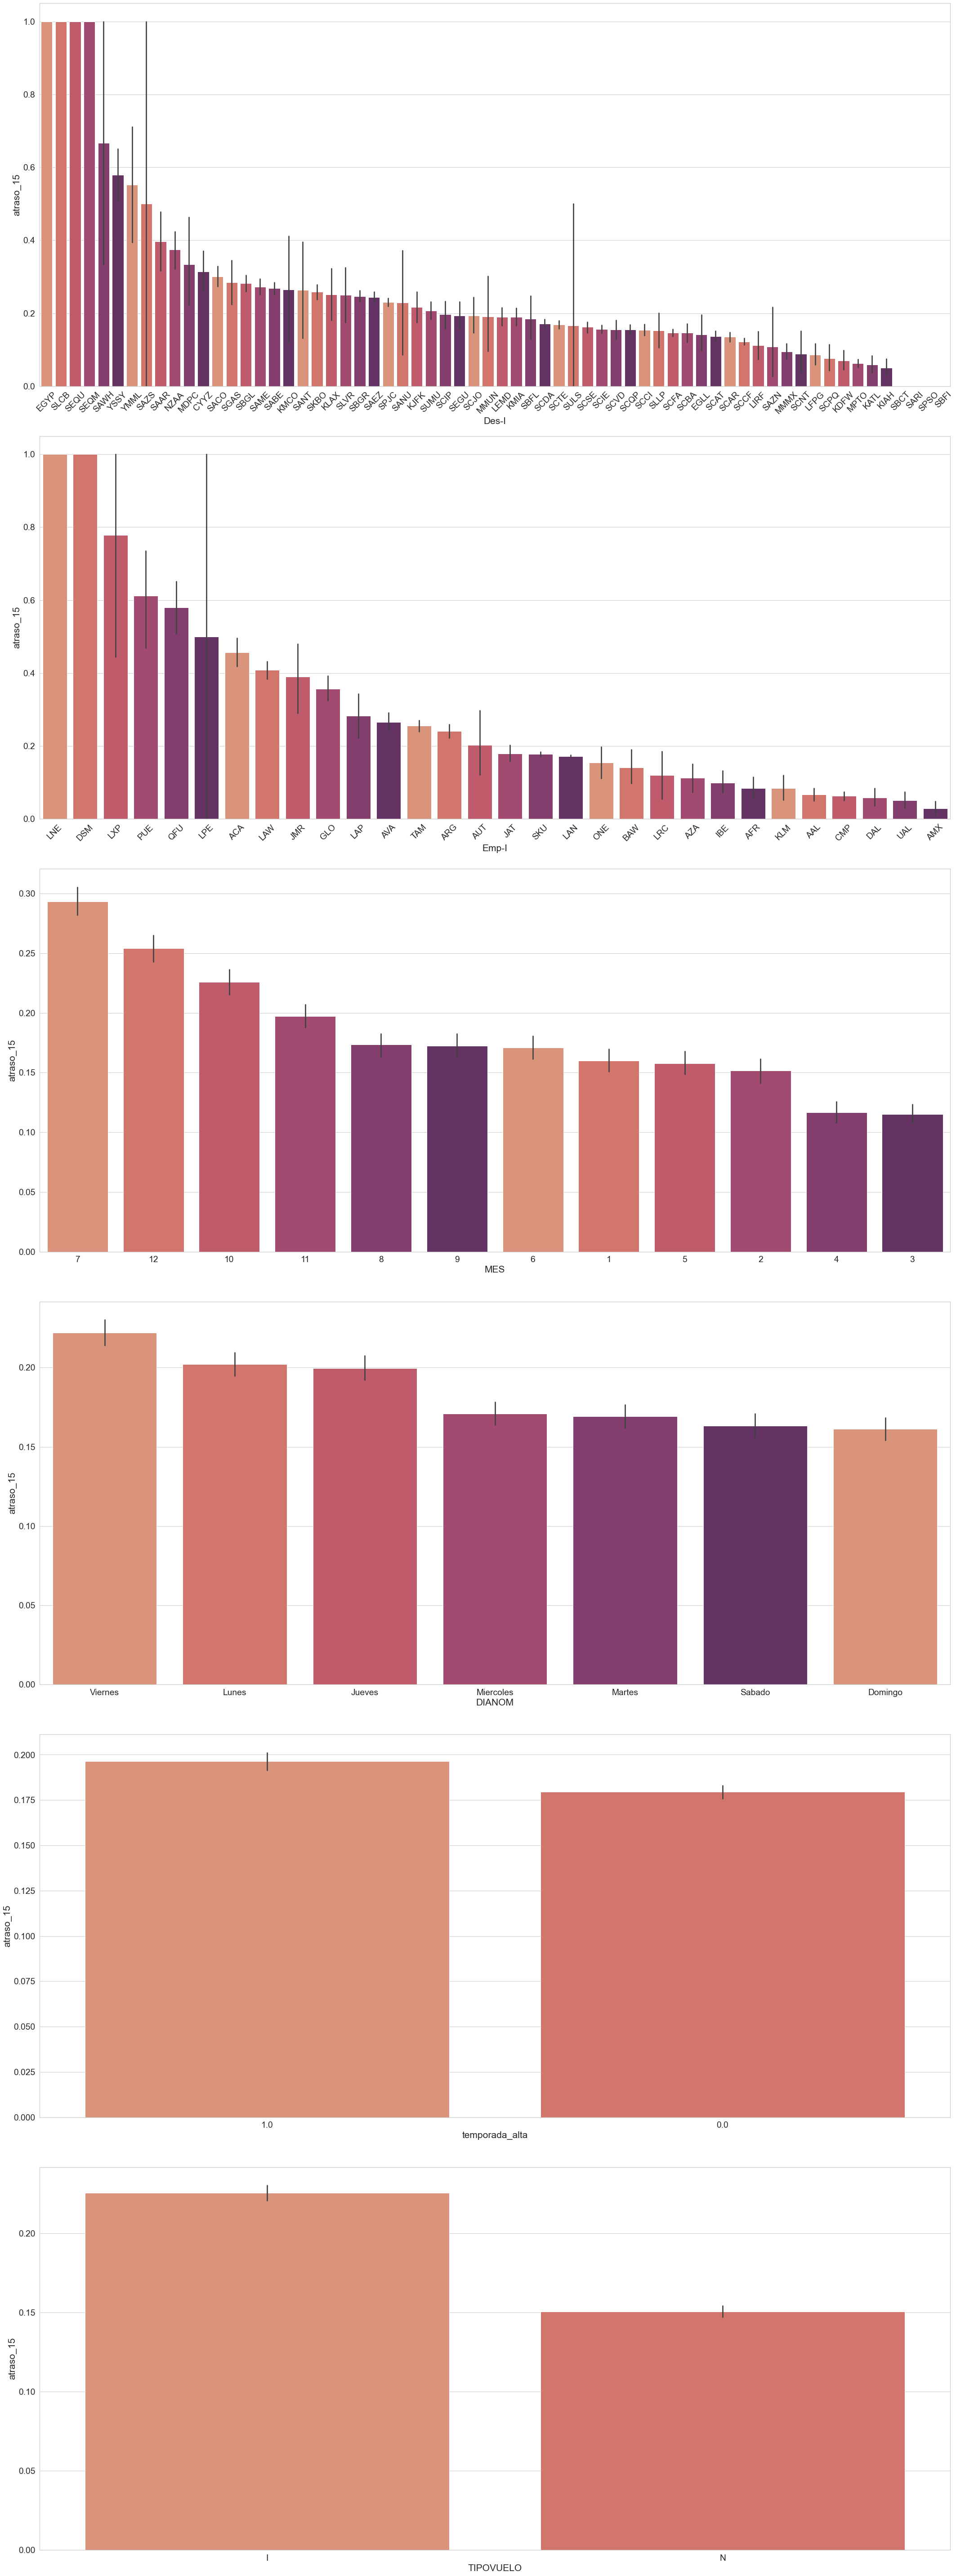

In [13]:
sns.set(rc={'figure.figsize':(30,80)})
sns.set_theme(style="whitegrid", font_scale=1.75)

_vars = ['Des-I','Emp-I','MES','DIANOM', 'temporada_alta', 'TIPOVUELO']
plt.figure()
i = 0
for cat in _vars:
    plt.subplot(len(_vars), 1, 1 + i)
    order = pd.pivot_table(data=df, index = cat)['atraso_15'].sort_values(ascending=False).index
    ax = sns.barplot(data=df, x = cat, y = 'atraso_15', order = order, palette = sns.color_palette("flare"))
    if cat in ['Des-I','Emp-I']: r = 45
    else: r = 0
    ax.set_xticklabels(ax.get_xticklabels(),rotation=r)
    i += 1
plt.tight_layout()

In [14]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia'],
      dtype='object')

In [23]:
features = ['Vlo-I', 'Des-I', 'Emp-I', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'temporada_alta', 'periodo_dia']
target = 'atraso_15'

x, x_test, y, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42, stratify=df[target])

grid = {'lambda':[0.5, 1 , 2]
        , 'alpha':[0, 0.5]
        , 'gamma':[0]
        , 'max_delta_step':[0, 1, 5]
        , 'n_estimators': [500]
        , 'learning_rate':[0.1, 0.3]
        , 'max_depth':[3,6]}
_xgb = xgb.XGBClassifier(tree_method="hist", enable_categorical=True)
clf = GridSearchCV(_xgb, grid, cv = 3)
clf.fit(x, y)

C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "

C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 907, in fit
    eval_group=None, label_transform=label_transform)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 267, in _wrap_evaluation_matrices
    missing=self.missing, nthread=self.n_jobs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 505, in __init__
    enable_categorical=enable_categorical)
  File "C:\Users\Felipe\

C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "

C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "

C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "

C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 907, in fit
    eval_group=None, label_transform=label_transform)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 267, in _wrap_evaluation_matrices
    missing=self.missing, nthread=self.n_jobs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 505, in __init__
    enable_categorical=enable_categorical)
  File "C:\Users\Felipe\

C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 907, in fit
    eval_group=None, label_transform=label_transform)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 267, in _wrap_evaluation_matrices
    missing=self.missing, nthread=self.n_jobs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 505, in __init__
    enable_categorical=enable_categorical)
  File "C:\Users\Felipe\

C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 907, in fit
    eval_group=None, label_transform=label_transform)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 267, in _wrap_evaluation_matrices
    missing=self.missing, nthread=self.n_jobs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 505, in __init__
    enable_categorical=enable_categorical)
  File "C:\Users\Felipe\

C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 907, in fit
    eval_group=None, label_transform=label_transform)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 267, in _wrap_evaluation_matrices
    missing=self.missing, nthread=self.n_jobs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 505, in __init__
    enable_categorical=enable_categorical)
  File "C:\Users\Felipe\

C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 907, in fit
    eval_group=None, label_transform=label_transform)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 267, in _wrap_evaluation_matrices
    missing=self.missing, nthread=self.n_jobs)
  File "C:\Users\Felipe\Anaconda3\lib\site-packages\xgboost\core.py", line 505, in __init__
    enable_categorical=enable_categorical)
  File "C:\Users\Felipe\

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Vlo-I, Des-I, Emp-I, DIA, MES, DIANOM, TIPOVUELO, temporada_alta, periodo_dia